In [3]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, transform
import os
import open3d
import torch
import h5py
from io import StringIO
import matplotlib.patches as patches
from skimage.measure import regionprops
from skimage import filters
from numpy import linalg
import scipy

In [86]:
def getcen(el):
    centre = [linalg.det(el[:,[1,2,3]]), -linalg.det(el[:,[0,2,3]]), linalg.det(el[:,[0,1,3]])]/(-linalg.det(el[:,[0,1,2]]))
    return centre

In [3]:
flname = '1484737/1494452'

In [7]:
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_000.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)

In [9]:
def prmatread(path):
    with open(path, 'r') as f:
        prmatext = f.readlines()
    pr2 = [prmatext[i].replace('[','').replace(']','').replace(';','')\
           for i in range(len(prmatext))]
    pr3 = ''
    for i in pr2:
        pr3+=i
    pr4 = np.genfromtxt(StringIO(pr3), delimiter=',')
    return pr4

In [41]:
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_000.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')

In [5]:
prm = prmatread('C:/cherepashkin1/phenoseed/598/1484717/1491988_ProjectionMatrices.txt')

In [23]:
cam0 = prm[:4,:]

In [10]:
cam0 = prmat[:4,:]

In [10]:
prmat.shape

(144, 4)

In [42]:
pr0 = prmat[:4,:]

In [11]:
Y_N = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/Y_N_500.csv', delimiter=',')

In [12]:
Y_N2 = Y_N[:500,:]

In [13]:
bX = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/bX_500.csv', delimiter=',')

In [14]:
dirs = bX[:2,:]

In [30]:
inputimg = np.genfromtxt('C:/cherepashkin1/598test/plot_output/e058/004/input_image_train', delimiter=',')

In [16]:
dirs = dirs.transpose()

In [17]:
mainpath = 'C:/cherepashkin1/phenoseed_csv/'
F_Nw = np.array(h5py.File(os.path.join(
    mainpath, '598csv9_F_N.h5').replace('\\', '/'),
        'r').get('dataset'))
with open(os.path.join(mainpath,'598csv9_F_N_file_names.txt'),'r') as f:
    F_N_names = f.readlines()
F_N_names = [c.replace('\n','') for c in F_N_names]
F_N2 = F_Nw[F_N_names.index(flname.replace('/','_'))]
p = np.zeros([3,500])
# print(dirs.shape, far.shape)
far = np.matmul(Y_N2, F_N2)
p[0,:]=far*np.cos(dirs[:,0])*np.sin(dirs[:,1])
p[1,:]=far*np.sin(dirs[:,0])*np.sin(dirs[:,1])
p[2,:]=far*np.cos(dirs[:,1])
# p *= vox2mm

In [18]:
p.shape

(3, 500)

In [27]:
F_N2.shape

(441,)

In [19]:
def homopcd(pcd):
    pcd0 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
        pcd.shape[0]), axis = 1)), axis=1)
    pcd1 = pcd0
    pcd2 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
    pcd3 = pcd2 - np.mean(pcd2,axis=0)
    pcd3 = pcd3.transpose()
    return(pcd3)

In [24]:
p.shape

(3, 500)

In [35]:
p0.shape

(4, 500)

In [57]:
pcd0.shape

(4, 36328)

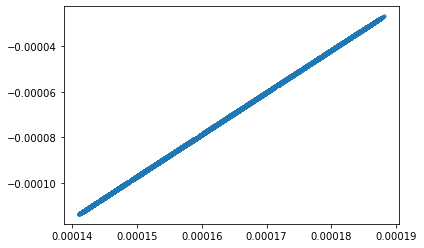

In [58]:
# fig = plt.figure()


In [50]:
pcd0

array([[-1.75429234e-04, -5.03069126e-05,  1.26866102e-05,
         5.00000000e-02],
       [-1.76756800e-04, -4.78439458e-05,  1.26783539e-05,
         5.00000000e-02],
       [-1.76925742e-04, -4.75322888e-05,  1.26772692e-05,
         5.00000000e-02],
       ...,
       [-1.51170422e-04, -9.49831856e-05,  1.28438061e-05,
         5.00000000e-02],
       [-1.50633211e-04, -9.59786833e-05,  1.28471694e-05,
         5.00000000e-02],
       [-1.52588811e-04, -9.23563859e-05,  1.28348954e-05,
         5.00000000e-02]])

In [658]:
pcd0 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
pcd0 = np.matmul(pcd0,pr0.transpose())
pcd0 = pcd0/np.repeat(np.expand_dims(pcd0[:,3], axis=1), 4, axis = 1)
# pcd0*=0.05
pcd0 = pcd0.transpose()
pcd0 = pcd0[:,::25]
# plt.scatter(pcd0[0,:],pcd0[1,:], s=10, alpha=0.5)

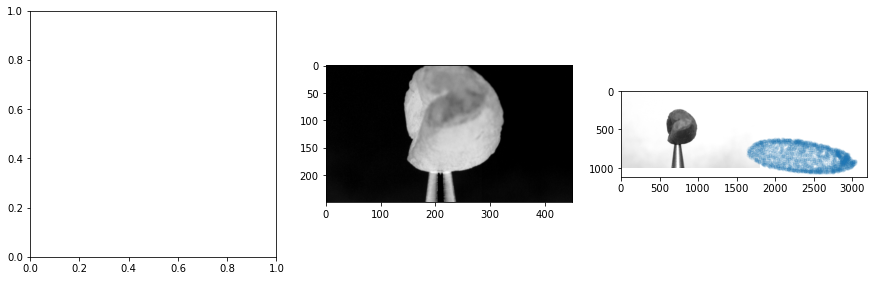

In [660]:
# pcd = p2[0].numpy().transpose()
f, (a0, a1, a2) = plt.subplots(1, 3, figsize=(15,5))
# p0 = homopcd(p[0].transpose())
p0 = homopcd(p.transpose())
# p1 = homopcd(pcd0[::25,:]*0.05)
# p0 *= 0.05
# a0.scatter(-p0[0,:],p0[1,:], s=10, alpha=0.5)
# sz = 1000
# a0.set_xlim([-sz,sz])
# a0.set_ylim([-sz,sz])
a0.set_aspect('equal', adjustable='box')
a1.imshow(inputimg, cmap='gray')
# p3 = p1*150
# a1.scatter(-p3[0,:]+700,-p3[1,:]+500, s=10, alpha=0.5)
a2.imshow(img, cmap='gray')
a2.scatter(pcd0[0,:],pcd0[1,:], s=10, alpha=0.1)

In [71]:
pr0

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

# Transform offset

In [84]:
new_image = np.zeros([enim, new_h, new_w]).astype(np.single)
        # print(image.shape)
for i in range(enim):
    # img = np.squeeze(image[i])
    # img *= 255

# image = new_image/255
image = new_image

IndentationError: expected an indented block (<ipython-input-84-fb8e28992b9b>, line 8)

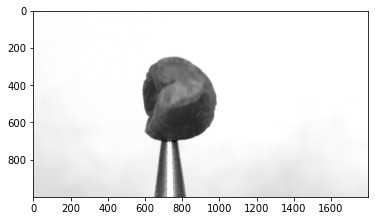

In [101]:
plt.imshow(img, cmap='gray')

(700, 1260)
(700, 1260)
(250, 450)


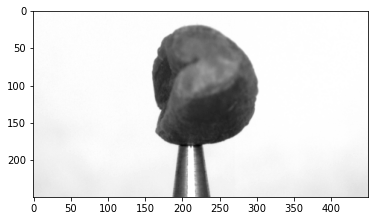

In [132]:
new_h = 700
new_w = 1260
# img0 = np.squeeze(255-img)
img0 = 255-img
properties = regionprops(
    (img0 > filters.threshold_otsu(img0)).astype(int), img0)
cms = tuple(map(lambda x: int(x), properties[0].centroid))
# print(cms)
tempa = (img[cms[0] - new_h//2: cms[0] + new_h//2,
         cms[1] - new_w//2: cms[1] + new_w//2]).astype(np.uint8)
padh = (new_h-tempa.shape[0])//2
padw = (new_w-tempa.shape[1])//2
# print(padh, padw)
# print(tempa.shape)
tempb = np.pad(
    tempa, ((padh, new_h-tempa.shape[0]-padh),
            (padw, new_w-tempa.shape[1]-padw)),
    mode='constant', constant_values=0)
# print(tempb.shape)
new_img = np.squeeze(
    transform.resize(tempb,(250, 450),
        preserve_range=True))
plt.imshow(new_img, cmap='gray')
print(new_img.shape)

In [116]:
type(cms)

tuple

In [117]:
cms[0]

543

In [ ]:
# Create a Rectangle patch
rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes


In [558]:
c = cms
h = 1000
hc = 700
hn = 250
w, wc, wn = h*1.8, hc*1.8, hn*1.8
k = hn/hc

In [269]:
pcd0.shape

(4, 1454)

In [272]:
pcd0.shape

(4, 1454)

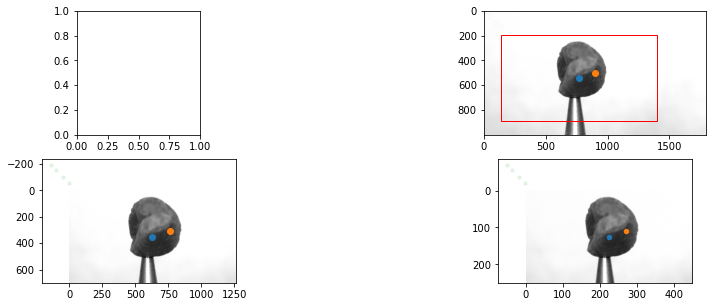

In [954]:
f, ((a0, a1), (a2, a3)) = plt.subplots(2, 2, figsize=(15,5))
p0 = homopcd(p.transpose())
a0.set_aspect('equal', adjustable='box')
a1.imshow(img, cmap='gray')
a1.scatter(cms[1],cms[0])
a1.scatter(1800/2,1000/2)
a1.scatter(pcd0[0,:], pcd0[1,:], alpha = 0.01)
a1.add_patch(patches.Rectangle((cms[1]-1260/2, cms[0]-700/2), 1260, 700, linewidth=1, edgecolor='r', facecolor='none'))

a2.imshow(tempa, cmap='gray')
a2.scatter(wc/2,hc/2)
a2.scatter(wc/2-(c[1]-w/2),hc/2-(c[0]-h/2))
a2.scatter(pcd0[0,:]-(c[1]-wc/2),pcd0[1,:]-(c[0]-hc/2), s=10, alpha=0.1)
# pcd2 = (pcd0 + np.repeat(np.expand_dims([c[1]-w/2, c[0]-750, 0, 0],axis=1),pcd0.shape[1],axis=1))*250/700
a3.imshow(new_img, cmap='gray')

a3.scatter(450/2,250/2, s=20)
a3.scatter(wn/2-(c[1]-w/2)*k,hn/2-(c[0]-h/2)*k, s=20)
a3.scatter((pcd0[0,:]-(c[1]-wc/2))*k,(pcd0[1,:]-(c[0]-hc/2))*k, s=10, alpha=0.1)

# move original pc on the offset

In [296]:
pcd0.shape

(4, 1454)

In [297]:
pcd.shape

(36328, 3)

In [79]:
pcd2 = (pcd + np.repeat(np.expand_dims([c[1]-w/2, c[0]-750, 0],axis=1),pcd0.shape[1],axis=1))
pcd1 = np.concatenate((pcd2, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
pcd1 = np.matmul(pcd0,pr0.transpose())
pcd1 = pcd0/np.repeat(np.expand_dims(pcd0[:,3], axis=1), 4, axis = 1)
# pd0*=0.05
pcd1 = pcd1.transpose()
pcd1 = pcd1[:,::25]
# plt.scatter(pcd0[0,:],pcd0[1,:], s=10, alpha=0.5)

In [328]:
pr0.shape

(4, 4)

In [330]:
pcd.shape

(36328, 3)

In [331]:
pcd3 = pcd.transpose()

In [355]:
cv = np.array([wc/2-c[1], hc/2-c[0], 0, 0])

In [357]:
type(cv)

numpy.ndarray

In [368]:
np.matmul(linalg.pinv(pr0),cv)

array([-1.88551205e-01, -2.60426289e-01, -1.28754062e-02,  5.40354730e-06])

In [367]:
np.matmul(cv,linalg.pinv(pr0))

array([-1.88551205e-01, -2.60426289e-01,  2.48504000e+02,  2.48504000e+02])

In [365]:
np.concatenate((pcd, np.expand_dims(np.repeat(1,
        pcd.shape[0]), axis = 1)), axis=1).shape

(36328, 4)

In [366]:
np.matmul(linalg.pinv(pr0),cv).shape

(4,)

In [375]:
np.matmul(linalg.pinv(pr0),pr0)

array([[ 9.98256602e-01, -7.99890850e-04,  4.17099372e-02,
        -1.75048161e-05],
       [-7.99890850e-04,  9.99633001e-01,  1.91369893e-02,
        -8.03140699e-06],
       [ 4.17099372e-02,  1.91369893e-02,  2.11057313e-03,
         4.18793987e-04],
       [-1.75048161e-05, -8.03140693e-06,  4.18793987e-04,
         9.99999824e-01]])

In [376]:
np.matmul(pr0,linalg.pinv(pr0))

array([[ 1.00000000e+00, -2.62333558e-15,  4.66116035e-12,
         4.66116035e-12],
       [-2.77664176e-15,  1.00000000e+00, -3.81206178e-12,
        -3.81206178e-12],
       [-3.50375179e-18,  5.49533800e-18,  5.00000000e-01,
         5.00000000e-01],
       [-3.50375179e-18,  5.49533800e-18,  5.00000000e-01,
         5.00000000e-01]])

In [370]:
pcd3.shape

(36328, 4)

In [371]:
pcd3 = pcd3.transpose()

In [372]:
pcd3.shape

(4, 36328)

In [389]:
pr0.shape

(4, 4)

In [394]:
wc/2-c[1]

-140.0

In [395]:
 hc/2-c[0]

-193.0

In [426]:
np.matmul(linalg.pinv(pr0),np.array([1.8e4, 2.5e4, 0, 0]))

array([ 2.42420971e+01,  3.37341209e+01,  1.66020956e+00, -6.96756336e-04])

In [431]:
np.matmul(linalg.pinv(pr0.transpose()),np.array([1.8e4, 2.5e4, 0, 0]))

array([ 2.42420971e+01,  3.37341209e+01, -3.20526159e+04, -3.20526159e+04])

In [432]:
np.matmul(linalg.pinv(pr0).transpose(),np.array([1.8e4, 2.5e4, 0, 0]))

array([ 2.42420971e+01,  3.37341209e+01, -3.20526159e+04, -3.20526159e+04])

In [428]:
np.matmul(linalg.pinv(pr0),np.array([wc/2-c[1],  hc/2-c[0], 0, 1]))

array([-1.20567178, -0.81020411, -0.06593424, -0.00410456])

In [427]:
np.matmul(linalg.pinv(pr0),np.array([wc/2-c[1],  hc/2-c[0], 0, 1]))

array([-1.88551205e-01, -2.60426289e-01, -1.28754062e-02,  5.40354730e-06])

In [442]:
pr0[0,3]/pr0[2,3], pr0[1,3]/pr0[2,3]

(1509.4171074380165, 815.6074380165289)

In [443]:
140*1509

211260

In [444]:
193*815

157295

In [860]:
cv

array([-140., -193.,    0.,    1.])

In [861]:
print(140/25, 193/33)

5.6 5.848484848484849


In [862]:
193/5.6

34.464285714285715

In [863]:
# cv = np.array([1.8e4, 2.5e4, 0, 0])
# cv = np.array([wc/2-c[1],  hc/2-c[0], 0, 1])
# delta = np.matmul(linalg.pinv(pr0),cv)
# delta = np.array([ 2.42420971e+01,  3.37341209e+01,  1.66020956e+00, -6.96756336e-04])
delta = np.array([ 25,  34.46,  0, 0])
# cv = np.array([wc/2-c[1], hc/2-c[0], 0, 0])
pcd3 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
        pcd.shape[0]), axis = 1)), axis=1) + delta
pcd3 = np.matmul(pr0,pcd3.transpose())
print(pcd1.shape)
print(np.repeat(np.expand_dims(pcd1[3,:].transpose(), axis=0), 4, axis = 0).shape)
pcd4 = pcd3/np.repeat(np.expand_dims(pcd3[3,:].transpose(), axis=0), 4, axis = 0)

(36328, 4)
(4, 4)


In [864]:
print(pcd4.shape)

(4, 36328)


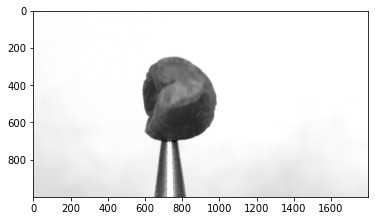

In [867]:
plt.imshow(img, cmap='gray')

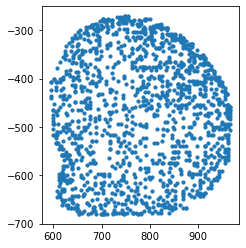

In [874]:
fig, ax = plt.subplots(1,1)
ax.set_aspect('equal', adjustable='box')
ax.scatter(pcd2[0,:],-pcd2[1,:], s=10)

In [909]:
def getcen(el):
    centre = [linalg.det(el[:,[1,2,3]]), -linalg.det(el[:,[0,2,3]]), linalg.det(el[:,[0,1,3]])]/(-linalg.det(el[:,[0,1,2]]))
    return centre

In [901]:
pr0.shape

(4, 4)

In [903]:
pr0

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [905]:
pr0[:3,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [902]:
linalg.det(pr0[:,[1,2,3]])

LinAlgError: Last 2 dimensions of the array must be square

In [910]:
cen2 = getcen(pr0[:3,:])

In [911]:
cen2

array([   99.5953582 ,    45.69547294, -2382.76923077])

In [913]:
cv

array([-140., -193.,    0.,    1.])

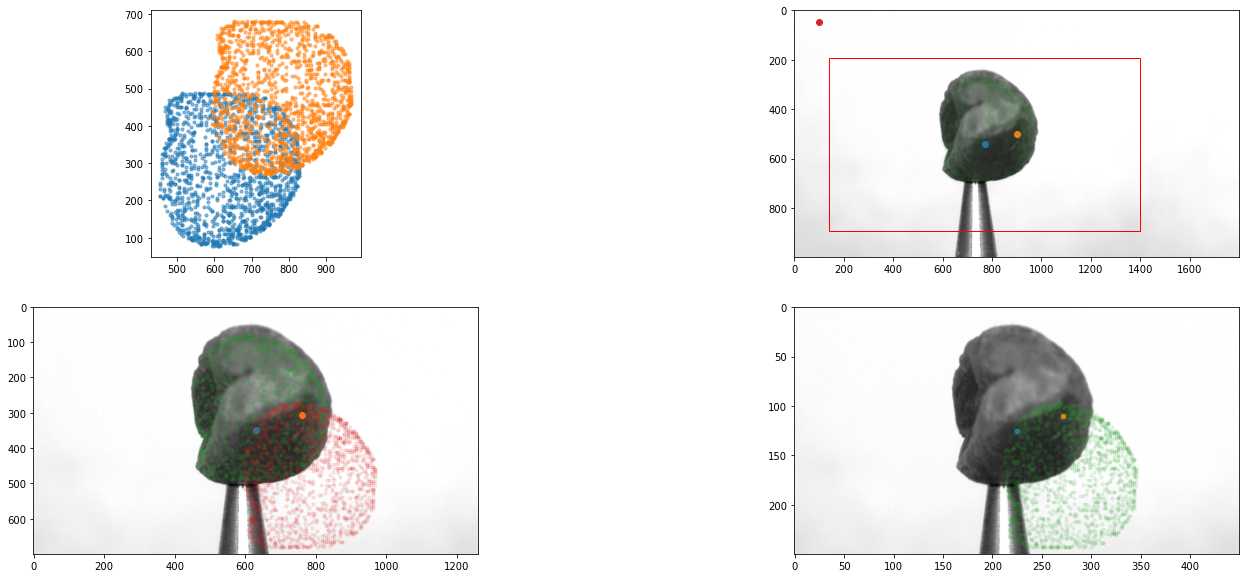

In [953]:
f, ((a0, a1), (a2, a3)) = plt.subplots(2, 2, figsize=(25,10))
# p0 = homopcd(p.transpose())
a0.set_aspect('equal', adjustable='box')
a0.scatter(pcd2[0,:]-(c[1]-wc/2),pcd2[1,:]-(c[0]-hc/2), s=10, alpha=0.5)
a0.scatter(pcd4[0,::25],pcd4[1,::25], s=10, alpha=0.5)
a1.imshow(img, cmap='gray')
a1.scatter(cms[1],cms[0])
a1.scatter(1800/2,1000/2)
a1.scatter(pcd2[0,:], pcd2[1,:], alpha = 0.01)
a1.add_patch(patches.Rectangle((cms[1]-1260/2, cms[0]-700/2), 1260, 700, linewidth=1, edgecolor='r', facecolor='none'))
a1.scatter(cen2[0],cen2[1])

a2.imshow(tempa, cmap='gray')
a2.scatter(wc/2,hc/2)
a2.scatter(wc/2-(c[1]-w/2),hc/2-(c[0]-h/2))
a2.scatter(pcd2[0,:]-(c[1]-wc/2),pcd2[1,:]-(c[0]-hc/2), s=10, alpha=0.1)
a2.scatter(pcd4[0,::25],pcd4[1,::25], s=10, alpha=0.1)
# pcd2 = (pcd0 + np.repeat(np.expand_dims([c[1]-w/2, c[0]-750, 0, 0],axis=1),pcd0.shape[1],axis=1))*250/700
a3.imshow(new_img, cmap='gray')

a3.scatter(450/2,250/2, s=20)
a3.scatter(wn/2-(c[1]-w/2)*k,hn/2-(c[0]-h/2)*k, s=20)
#a3.scatter((pcd0[0,:]-(c[1]-wc/2))*k,(pcd0[1,:]-(c[0]-hc/2))*k, s=10, alpha=0.1)
a3.scatter(pcd4[0,::25]*k,pcd4[1,::25]*k, s=10, alpha=0.1)

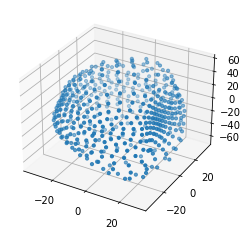

In [875]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(p[0,:],p[1,:],p[2,:], s=10)

In [876]:
pcd2.shape

(4, 1454)

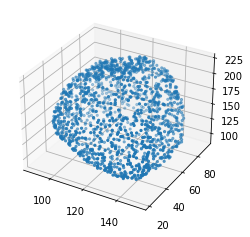

In [881]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pcd[::25,0],pcd[::25,1],pcd[::25,2], s=5)

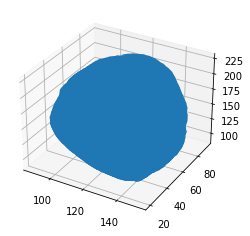

In [154]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pcd[:,0],pcd[:,1],pcd[:,2])

In [882]:
withprmat[:4,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [884]:
with np.printoptions(precision=0, suppress=True):
    print(prmat[:4,:])

[[    740.       0.     -46. -182639.]
 [      0.     740.     -27.  -98688.]
 [      0.       0.      -0.    -121.]
 [      0.       0.      -0.    -121.]]


In [88]:
el = np.genfromtxt('C:/circles/example.txt', delimiter=',')

In [306]:
el[:,[0,1,2]]

array([[ 3.53553e+02,  3.39645e+02,  2.77744e+02],
       [-1.03528e+02,  2.33212e+01,  4.59607e+02],
       [ 7.07107e-01, -3.53553e-01,  6.12372e-01]])

In [1153]:
linalg.det(el[:,:3])

200000.30189244082

In [91]:
-np.matmul(linalg.inv(el[:3,:3]),el[:,3])

array([1000.00073079, 2000.001952  , 1500.00028314])

In [491]:
centre

array([1000, 2000, 1500])

In [1156]:
centre = ([linalg.det(el[:,[1,2,3]]), -linalg.det(el[:,[0,2,3]]), linalg.det(el[:,[0,1,3]])]/(-linalg.det(el[:,[0,1,2]])))

In [1157]:
centre.shape

(3,)

In [1158]:
centre

array([1000.00073079, 2000.001952  , 1500.00028314])

In [1159]:
np.matmul(centre,el[:3,:3])

array([ 147557.71698651,  385757.3641317 , 1197877.65829743])

In [1161]:
-np.matmul(el[:3,:3],centre)

array([-1.44946e+06, -6.32525e+05, -9.18559e+02])

In [500]:
a

array([[ 1,  3,  1],
       [ 2,  4, -3],
       [ 1,  1, -1]])

In [501]:
a.T

array([[ 1,  2,  1],
       [ 3,  4,  1],
       [ 1, -3, -1]])

In [326]:
centre@el[:3,:3]

array([ 147557.6605,  385757.0705, 1197876.558 ])

In [325]:
np.matmul(el[:3,:3],centre)

array([1.449459e+06, 6.325249e+05, 9.185590e+02])

In [325]:
np.matmul(el[:3,:3],centre)

array([1.449459e+06, 6.325249e+05, 9.185590e+02])

In [318]:
linalg.qr(el[:3,:3])

(array([[-9.59699720e-01, -2.81027102e-01,  4.63308959e-04],
        [ 2.81020929e-01, -9.59664772e-01,  8.41208347e-03],
        [-1.91940216e-03,  8.20327367e-03,  9.99964510e-01]]),
 array([[-368.39960721, -319.40278759, -137.39282822],
        [   0.        , -117.83288451, -519.11721477],
        [   0.        ,    0.        ,    4.607284  ]]))

In [497]:
flip.T

array([[-1,  0,  0],
       [ 0,  1,  0],
       [ 0,  0,  1]])

In [499]:
flip

array([[-1,  0,  0],
       [ 0,  1,  0],
       [ 0,  0,  1]])

In [504]:
with np.printoptions(precision=2, suppress=True):
    print(np.matmul(scipy.linalg.rq(el[:3,:3])[0], -flip), '\n', np.matmul(-flip, scipy.linalg.rq(el[:3,:3])[1]))
#     np.array([2.0]) / 3

[[468.16  91.23 300.  ]
 [  0.   427.2  200.  ]
 [  0.     0.     1.  ]] 
 [[ 0.41  0.91  0.05]
 [-0.57  0.22  0.79]
 [ 0.71 -0.35  0.61]]


In [461]:
a = np.array([[1,1],[2,3]]) 
print(np.sqrt(5)*linalg.qr(a)[0], '\n', np.sqrt(5)*linalg.qr(a)[1])

[[-1. -2.]
 [-2.  1.]] 
 [[-5. -7.]
 [ 0.  1.]]


In [464]:
a = np.array([[1,3,1],[2,4,-3],[1,1,-1]]) 
with np.printoptions(precision=2, suppress=True):
    print(np.sqrt(6)*linalg.qr(a)[0], '\n', linalg.qr(a)[1])

[[-1.    1.73  1.41]
 [-2.   -0.   -1.41]
 [-1.   -1.73  1.41]] 
 [[-2.45 -4.9   2.45]
 [ 0.    1.41  1.41]
 [ 0.    0.    1.73]]


In [469]:
flip = np.array([[-1, -1, -1],[0,0,0], [0,0,0]])
print(flip == 1)

[[ True  True  True]
 [False False False]
 [False False False]]


In [478]:
flip = np.array([[-1, 0, 0],[0,1,0], [0,0,1]])
# print(flip == 1)

In [480]:
flip

array([[-1,  0,  0],
       [ 0,  1,  0],
       [ 0,  0,  1]])

In [485]:
a = np.random.rand(3,3)

In [486]:
a

array([[0.15289798, 0.44151709, 0.87257376],
       [0.65071677, 0.16981389, 0.12464231],
       [0.59738503, 0.72908403, 0.62495391]])

In [488]:
np.matmul(a,flip)

array([[-0.15289798,  0.44151709,  0.87257376],
       [-0.65071677,  0.16981389,  0.12464231],
       [-0.59738503,  0.72908403,  0.62495391]])

In [472]:
np.negative(flip, where = flip == 1)

array([[-1, -1, -1],
       [ 2,  4, -3],
       [ 1,  1, -1]])

In [489]:
a = np.array([[1,3,1],[2,4,-3],[1,1,-1]]) 
with np.printoptions(precision=2, suppress=True):
    print(np.sqrt(6)*np.matmul(scipy.linalg.qr(a)[0],flip),  '\n', np.matmul(flip,scipy.linalg.qr(a)[1]))

[[ 1.    1.73  1.41]
 [ 2.   -0.   -1.41]
 [ 1.   -1.73  1.41]] 
 [[ 2.45  4.9  -2.45]
 [ 0.    1.41  1.41]
 [ 0.    0.    1.73]]


In [ ]:
from scipy import linalg

In [465]:
import scipy

In [447]:
# linalg.qr(el)
linalg.qr(el)
np.around(linalg.qr(el),3)
# np.set_printoptions(precision=3)

ValueError: could not broadcast input array from shape (3,3) into shape (3)

# calibration matrix K for real seed

In [1113]:
flip

array([[-1,  0,  0],
       [ 0,  1,  0],
       [ 0,  0,  1]])

In [1116]:
scipy.linalg.rq(pr0[:3,:3])

(array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01],
        [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01],
        [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02]]),
 array([[ 1.,  0.,  0.],
        [-0.,  1.,  0.],
        [-0., -0.,  1.]]))

In [888]:
with np.printoptions(precision=0, suppress=True):
#     print(np.matmul(scipy.linalg.rq(pr0[:3,:3])[0], -flip), '\n', np.matmul(-flip, scipy.linalg.rq(pr0[:3,:3])[1]))
    K = np.matmul(scipy.linalg.rq(pr0[:3,:3])[0], -flip)
    R = np.matmul(-flip, scipy.linalg.rq(pr0[:3,:3])[1])
    print(R)
    print(K)
    print(pr0)
#     print(np.matmul(K,R))
#     print(pr0)
#     np.array([2.0]) / 3

[[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
[[ 740.    0.   46.]
 [   0. -740.   27.]
 [   0.    0.    0.]]
[[    740.       0.     -46. -182639.]
 [      0.     740.     -27.  -98688.]
 [      0.       0.      -0.    -121.]
 [      0.       0.      -0.    -121.]]


In [889]:
K

array([[ 7.4039063e+02,  0.0000000e+00,  4.5703125e+01],
       [ 0.0000000e+00, -7.4039063e+02,  2.7218750e+01],
       [ 0.0000000e+00,  0.0000000e+00,  5.0781250e-02]])

In [893]:
K2 = np.copy(pr0)
K2[:3,:3] = K
K2=linalg.pinv(K2)

In [894]:
np.matmul(K2,cv)

array([-6.00640440e-01,  4.49497475e-01, -9.84615385e+00, -4.13223140e-03])

In [511]:
K2 = K + np.array([[0, 0, 10],[0,0,10],[0,0,0]])

In [512]:
K2

array([[ 7.4039063e+02,  0.0000000e+00,  5.5703125e+01],
       [ 0.0000000e+00, -7.4039063e+02,  3.7218750e+01],
       [ 0.0000000e+00,  0.0000000e+00,  5.0781250e-02]])

In [522]:
pr1.shape

(3, 3)

In [550]:
# cv = np.array([1.8e4, 2.5e4, 0, 0])
# cv = np.array([wc/2-c[1],  hc/2-c[0], 0, 1])
# delta = np.matmul(linalg.pinv(pr0),cv)
# delta = np.array([ 2.42420971e+01,  3.37341209e+01,  1.66020956e+00, -6.96756336e-04])
# cv = np.array([wc/2-c[1], hc/2-c[0], 0, 0])


(4, 36328)
(4, 36328)


In [555]:
pcd0.shape

(4, 1454)

In [576]:
pcd.shape

(36328, 3)

In [577]:
def showp(p):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    if p.shape[0] > p.shape[1]:
        p = p.T
    ax.scatter(p[0,:],p[1,:],p[2,:])

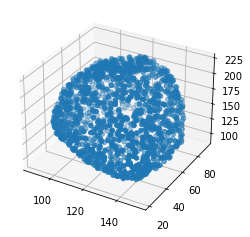

In [579]:
showp(pcd[::25])

In [603]:
prmat.shape

(144, 4)

In [ ]:
prmat = 

In [608]:
pr0 = prmat[:4,:]

In [615]:
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)

In [670]:
# pcd = o3d.io.read_point_cloud("../../test_data/fragment.ply")
# print(pcd)
# print(np.asarray(pcd.points))
# pcd2 = o3d.geometry.PointCloud()
# pcd2.points = o3d.utility.Vector3dVector(pcd)
# pcd.colors = o3d.utility.Vector3dVector(colors/65535)
# pcd.normals = o3d.utility.Vector3dVector(normals)
# o3d.visualization.draw_geometries([pcd2])
# pcd2 = open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply')
# pcd2 = 
open3d.visualization.draw_geometries([open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply')])

In [780]:
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_000.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')

In [781]:
prmat[:4,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

(4, 1454)


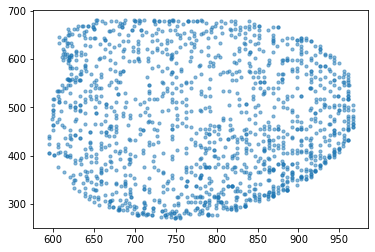

In [788]:
pcd0 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
# plt.scatter(pcd0[:,0],pcd0[:,1])
# print(pcd0.shape)
# print(pr0.shape, pcd0.shape)
pcd1 = np.matmul(pcd0,prmat[:4,:].T)
# pcd1 = np.matmul(pcd0,pr0.T)
# print(pcd1.shape)
pcd2 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
# print(pcd2.shape)
# pcd0*=0.05
pcd2 = pcd2[::25,:].T
print(pcd2.shape)
plt.scatter(pcd2[0,:],pcd2[1,:], s=10, alpha=0.5)

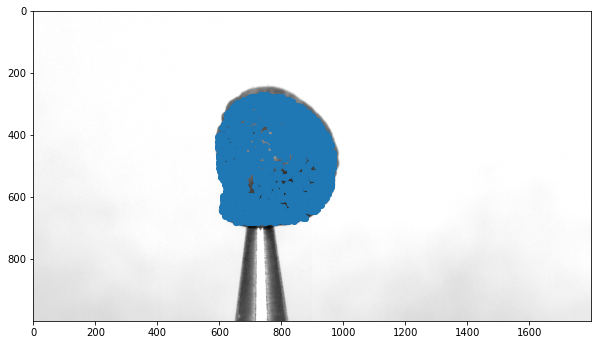

In [783]:
f, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(pcd2[0,:],pcd2[1,:])
ax.imshow(img, cmap='gray')
# ax.set_xlim(0,3000)
# ax.set_ylim(0,3000)

In [784]:
pcd2.shape

(4, 1454)

In [785]:
pr0 = prmat[:4,:]

In [786]:
pcd.shape

(36328, 3)

In [819]:
delta = np.array([ 2.42420971e+01,  3.37341209e+01,  1.66020956e+00, -6.96756336e-04])
r = np.matmul(scipy.linalg.rq(pr0[:3,:3])[0], -flip)
q = np.matmul(-flip, scipy.linalg.rq(pr0[:3,:3])[1])
pr2 = np.copy(prmat[:4,:])
pr2[:3,:3] = r+
pr3 = np.copy(prmat[:4,:])
pr3[:3,:3] = q

print(r.shape, q.shape, cv.shape)
delta2 = np.matmul(linalg.pinv(pr0),cv)
print(delta2)

(3, 3) (3, 3) (4,)
[-1.20567178 -0.81020411 -0.06593424 -0.00410456]


In [914]:
delta

array([25.  , 34.46,  0.  ,  0.  ])

In [915]:
cv

array([-140., -193.,    0.,    1.])

In [916]:
cen2

array([   99.5953582 ,    45.69547294, -2382.76923077])

In [918]:
d3 = cen2 - delta[:3]

In [919]:
d3

array([   74.5953582 ,    11.23547294, -2382.76923077])

In [926]:
np.hstack((d3,1))

array([ 7.45953582e+01,  1.12354729e+01, -2.38276923e+03,  1.00000000e+00])

In [935]:
pr0

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [951]:
d3 = np.array([0, 0, 0])

In [952]:
np.matmul(prmat[:4,:],np.hstack((d3,1)))/np.matmul(prmat[:4,:],np.hstack((d3,1)))[3]


array([1.50941711e+03, 8.15607438e+02, 1.00000000e+00, 1.00000000e+00])

In [1117]:
cv

array([-140., -193.,    0.,    1.])

In [11]:
# pr1, pr2 = [], []
pr1 = np.zeros([3,3])
pr2 = np.zeros([4,4])
pcd3 = np.zeros([4,pcd.shape[0]])

# r = np.matmul(scipy.linalg.rq(pr0[:3,:3])[0], -flip)
# q = np.matmul(-flip, scipy.linalg.rq(pr0[:3,:3])[1])
r = scipy.linalg.rq(pr0[:3,:3])[0]
q = scipy.linalg.rq(pr0[:3,:3])[1]
pr1 = np.matmul(r + np.array([[0, 0, cv[0]],[0,0,cv[1]],[0,0,0]]), q)
pr2 = np.copy(prmat[:4,:])
pr2[:3,:3] = pr1

# print(pr2)
pcd3 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
        pcd.shape[0]), axis = 1)), axis=1)
# pcd3 = pcd3 + 
pcd3 = np.matmul(pr0,pcd3.T)
print(pcd3.shape)
# pcd3 = pcd3.T
# print(pcd1.shape)
# print(np.repeat(np.expand_dims(pcd1[3,:].transpose(), axis=0), 4, axis = 0).shape)
pcd4 = pcd3/np.repeat(np.expand_dims(pcd3[3,:].transpose(), axis=0), 4, axis = 0)
f, ((a0, a1), (a2, a3)) = plt.subplots(2, 2, figsize=(15,5))

# p0 = homopcd(p.transpose())
a0.set_aspect('equal', adjustable='box')
a1.imshow(img, cmap='gray')
a1.scatter(cms[1],cms[0])
a1.scatter(1800/2,1000/2)
d4 = np.matmul(prmat[:4,:],np.hstack((d3,1)))
print(d4)
d4 = d4/d4[3]
print(d4)
a1.scatter(pcd2[0,:], pcd2[1,:], alpha = 0.01)
a1.add_patch(patches.Rectangle((cms[1]-1260/2, cms[0]-700/2), 1260, 700, linewidth=1, edgecolor='r', facecolor='none'))

a2.imshow(tempa, cmap='gray')
a2.scatter(wc/2,hc/2)
a2.scatter(wc/2-(c[1]-w/2),hc/2-(c[0]-h/2))
a2.scatter(pcd2[0,:]-(c[1]-wc/2),pcd2[1,:]-(c[0]-hc/2), s=10, alpha=0.1)
# pcd2 = (pcd0 + np.repeat(np.expand_dims([c[1]-w/2, c[0]-750, 0, 0],axis=1),pcd0.shape[1],axis=1))*250/700
a3.imshow(new_img, cmap='gray')

a3.scatter(450/2,250/2, s=20)
a3.scatter(wn/2-(c[1]-w/2)*k,hn/2-(c[0]-h/2)*k, s=20)
#a3.scatter((pcd0[0,:]-(c[1]-wc/2))*k,(pcd0[1,:]-(c[0]-hc/2))*k, s=10, alpha=0.1)
a3.scatter(pcd4[0,:]*k,pcd4[1,:]*k, s=10, alpha=0.1)


NameError: name 'pr0' is not defined

In [535]:
a = np.random.randint(10,size=(3,3))
b = np.random.randint(10, size=(4,4))

In [536]:
print(a,'\n',b)

[[2 2 8]
 [6 8 8]
 [0 0 4]] 
 [[3 9 6 1]
 [2 9 8 6]
 [6 6 1 4]
 [7 6 2 5]]


In [537]:
a.shape

(3, 3)

In [542]:
b[:3,3].T

array([1, 6, 4])

In [544]:
c = b
c[:3,:3] = a

In [546]:
c

array([[2, 2, 8, 1],
       [6, 8, 8, 6],
       [0, 0, 4, 4],
       [7, 6, 2, 5]])

In [543]:
c = np.hstack((a, b[:3,3].T))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [539]:
print(c)

[[2 2 8]
 [6 8 8]
 [0 0 4]
 [7 6 2]]


# make inverse from offset with the right z 

In [960]:
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_000.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')

In [955]:
pcd0.shape

(36328, 4)

In [956]:
pcd0 = pcd0.T

In [965]:
pcd.shape

(36328, 3)

In [962]:
def showp(p):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    if p.shape[0] > p.shape[1]:
        p = p.T
    ax.scatter(p[0,:],p[1,:],p[2,:])

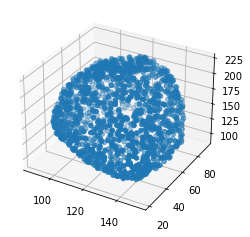

In [963]:
showp(pcd[::25])

In [ ]:
def 

In [1007]:
cv

array([-140., -193.,    0.,    1.])

In [1008]:
delta

array([25.  , 34.46,  0.  ,  0.  ])

In [1015]:
pr0.shape

(4, 4)

In [1016]:
pr0

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [1018]:
pr0[:3,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [1014]:
np.matmul(linalg.pinv(pr0),np.array([cv[1], cv[0], -25, 1]))

array([24.15082632, 13.00585621,  1.25892074,  0.09864521])

In [1025]:
linalg.pinv(pr0[:3,:].T).shape

(3, 4)

In [1031]:
delta

array([25.  , 34.46,  0.  ,  0.  ])

In [1041]:
print(linalg.det(pr0[:3,:3]), linalg.det(pr0[:3,1:4]), linalg.det(pr0[1:4,:3]), linalg.det(pr0[1:4,1:4]))

-27837.178534739705 2772453.767340463 0.0 0.0


In [1051]:
2772453/-64612.

-42.909258342103634

In [ ]:
-64612.

In [1043]:
pri = linalg.pinv(pr0[:3,:].T)

In [1045]:
pri.shape

(3, 4)

In [1046]:
print(linalg.det(pri[:3,:3]), linalg.det(pri[:3,1:4]))

-6.3138351654906656e-12 6.288286748965993e-10


In [1047]:
linalg.det(pri[:3,1:4])/linalg.det(pri[:3,:3])

-99.59535819585041

In [1042]:
linalg.det(pr0[:3,1:4])/linalg.det(pr0[:3,:3])

-99.59535819625361

In [1037]:
linalg.det(pr0[:3,:3])

-27837.178534739705

In [1049]:
-27837/-64612

0.4308332817433294

In [1054]:
delta

array([25.  , 34.46,  0.  ,  0.  ])

In [1085]:
with np.printoptions(precision=2, suppress=True):
    print(-np.matmul(linalg.pinv(pr0[:3,:].T),np.array([cv[0], cv[1], 1, 1]))*130)

[    24.5      33.85 -64581.38]


In [1101]:
with np.printoptions(precision=2, suppress=True):
    print(-np.matmul(linalg.pinv(pr0[:3,:].T),np.array([cv[0], cv[1], 1, 1]))*130)

[    24.5      33.85 -64581.38]


In [1094]:
with np.printoptions(precision=2, suppress=True):
    print(-np.matmul(linalg.pinv(pr0[:3,:].T),np.array([cv[1], cv[0], -600000, 1])))

[    34.03     15.7  -64145.29]


In [1099]:
with np.printoptions(precision=2, suppress=True):
    print(-np.matmul(linalg.pinv(pr0[:3,:].T),np.array([1000, 0, -600000, 1])))

[    32.42     15.51 -61565.48]


In [1038]:
with np.printoptions(precision=0, suppress=True):
    print(np.matmul(linalg.pinv(pr0[:3,:].T),np.array([cv[1], cv[0], 0, 1]))*130)

[  -34.   -25. 71050.]


In [1004]:
pcd1 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
pcd1 = np.matmul(pcd1,pr0.T)

In [1006]:
pcd1.shape

(36328, 4)

In [1005]:
pcd1[:,2]

array([-125.671875  , -125.72265625, -125.72265625, ..., -132.2734375 ,
       -132.2734375 , -132.32421875])

In [997]:
pcd1[:,2]

array([1., 1., 1., ..., 1., 1., 1.])

NameError: name 'homopcd' is not defined

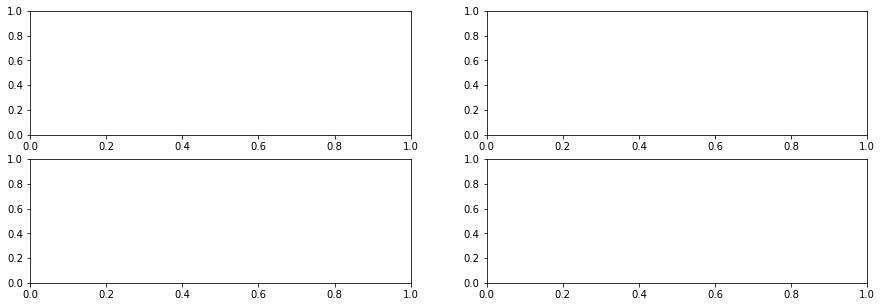

In [12]:
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_000.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')
pr0 = prmat[:4,:4]
f, ((a0, a1), (a2, a3)) = plt.subplots(2, 2, figsize=(15,5))
p0 = homopcd(p.transpose())

pcd1 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
pcd1 = np.matmul(pcd1,pr0.T)
pcd1 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)

# delta2 = np.matmul(linalg.pinv(pr0),np.array([cv[0], cv[1], 1, 1]))[:3]
delta2 = np.matmul(linalg.pinv(pr0[:3,:].T),np.array([-cv[0], -cv[1], 0, 1]))*130
delta2[2] = 0
# delta2 = delta[:3]
pcd2 = pcd+np.repeat(np.expand_dims(delta2, axis=0), pcd.shape[0], axis=0)
# pcd2 = pcd
# delta2 = delta
pcd2 = np.concatenate((pcd2, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
pcd2 = np.matmul(pcd2,pr0.T)
pcd2 = pcd2/np.repeat(np.expand_dims(pcd2[:,3], axis=1), 4, axis = 1)
# pd0*=0.05
# pcd1 = pcd1.T

a0.set_aspect('equal', adjustable='box')
a1.imshow(img, cmap='gray')
a1.scatter(cms[1],cms[0])
a1.scatter(1800/2,1000/2)
a1.scatter(pcd1[::25,0], pcd1[::25,1], alpha = 0.1)
a1.add_patch(patches.Rectangle((cms[1]-1260/2, cms[0]-700/2), 1260, 700, linewidth=1, edgecolor='r', facecolor='none'))

a2.imshow(tempa, cmap='gray')
a2.scatter(wc/2,hc/2)
a2.scatter(wc/2-(c[1]-w/2),hc/2-(c[0]-h/2))
# a2.scatter(pcd0[0,:]-(c[1]-wc/2),pcd0[1,:]-(c[0]-hc/2), s=10, alpha=0.1)
a2.scatter(pcd2[::25,0],pcd2[::25,1], s=10, alpha = 0.1)
# pcd2 = (pcd0 + np.repeat(np.expand_dims([c[1]-w/2, c[0]-750, 0, 0],axis=1),pcd0.shape[1],axis=1))*250/700
a3.imshow(new_img, cmap='gray')

a3.scatter(450/2,250/2, s=20)
a3.scatter(wn/2-(c[1]-w/2)*k,hn/2-(c[0]-h/2)*k, s=20)
a3.scatter((pcd0[0,:]-(c[1]-wc/2))*k,(pcd0[1,:]-(c[0]-hc/2))*k, s=10, alpha=0.1)

In [ ]:
with np.printoptions(precision=0, suppress=True):
    print(prmat[:4,:])

# check for the other seed

In [1064]:
flname = '1484737/1494453'
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_000.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')

(250, 450)


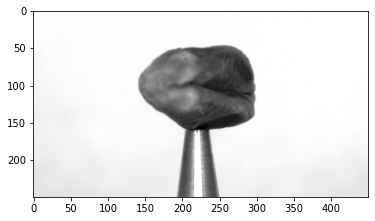

In [1065]:
new_h = 700
new_w = 1260
# img0 = np.squeeze(255-img)
img0 = 255-img
properties = regionprops(
    (img0 > filters.threshold_otsu(img0)).astype(int), img0)
cms = tuple(map(lambda x: int(x), properties[0].centroid))
# print(cms)
tempa = (img[cms[0] - new_h//2: cms[0] + new_h//2,
         cms[1] - new_w//2: cms[1] + new_w//2]).astype(np.uint8)
padh = (new_h-tempa.shape[0])//2
padw = (new_w-tempa.shape[1])//2
# print(padh, padw)
# print(tempa.shape)
tempb = np.pad(
    tempa, ((padh, new_h-tempa.shape[0]-padh),
            (padw, new_w-tempa.shape[1]-padw)),
    mode='constant', constant_values=0)
# print(tempb.shape)
new_img = np.squeeze(
    transform.resize(tempb,(250, 450),
        preserve_range=True))
plt.imshow(new_img, cmap='gray')
print(new_img.shape)

In [16]:
# cv = np.array([34, 24, 0, 0])

In [20]:
# c = cms


In [18]:
cms

(543, 770)

(36328, 4)
[121.10617155  56.74105373 158.76739705   1.        ]


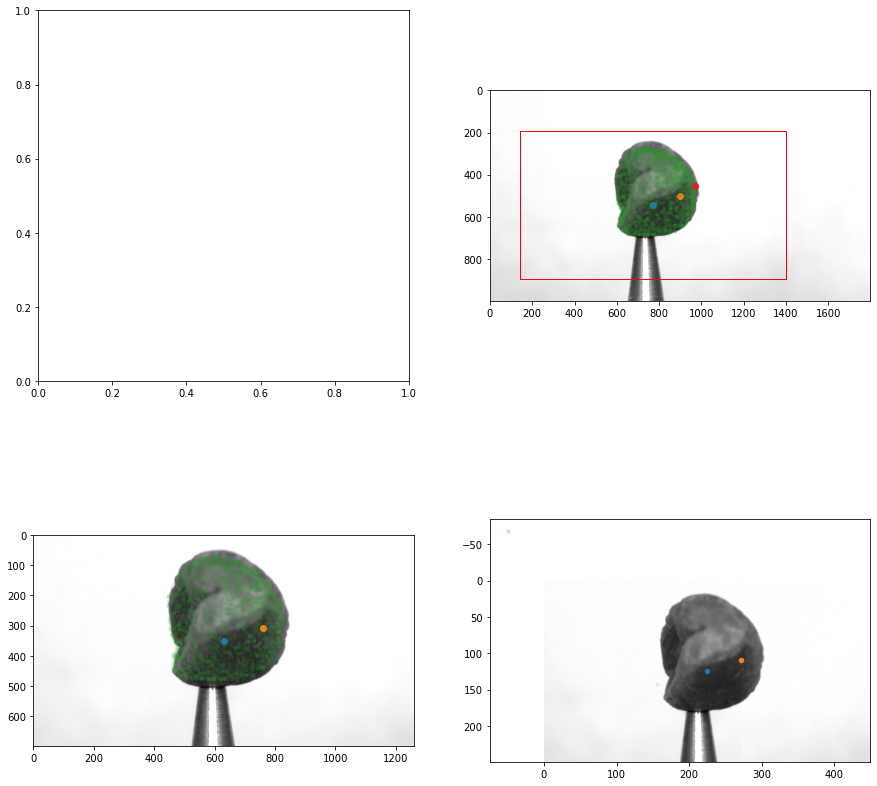

In [38]:
h = 1000
hc = 700
hn = 250
w, wc, wn = h*1.8, hc*1.8, hn*1.8
k = hn/hc
cv = np.array([wc/2-cms[1], hc/2-cms[0], 0, 0])
mu=1
flname = '1484737/1494452'
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_000.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')
# pr0 = prmat[:4,:]
new_h = 700
new_w = 1260
# img0 = np.squeeze(255-img)
img0 = 255-img
properties = regionprops(
    (img0 > filters.threshold_otsu(img0)).astype(int), img0)
cms = tuple(map(lambda x: int(x), properties[0].centroid))
# print(cms)
tempa = (img[cms[0] - new_h//2: cms[0] + new_h//2,
         cms[1] - new_w//2: cms[1] + new_w//2]).astype(np.uint8)
padh = (new_h-tempa.shape[0])//2
padw = (new_w-tempa.shape[1])//2
# print(padh, padw)
# print(tempa.shape)
tempb = np.pad(
    tempa, ((padh, new_h-tempa.shape[0]-padh),
            (padw, new_w-tempa.shape[1]-padw)),
    mode='constant', constant_values=0)
# print(tempb.shape)
new_img = np.squeeze(
    transform.resize(tempb,(250, 450),
        preserve_range=True))
# plt.imshow(new_img, cmap='gray')
# print(new_img.shape)

pr0 = prmat[:4,:4]
f, ((a0, a1), (a2, a3)) = plt.subplots(2, 2, figsize=(15,15))
# p0 = homopcd(p.transpose())

pcd1 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
# print(pcd1.shape)
pcd1 = np.matmul(pcd1,pr0.T)
pcd1 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
print(pcd1.shape)
# a0.scatter(pcd1[:,0], pcd1[:,1])
# pcd1 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
#     pcd.shape[0]), axis = 1)), axis=1)
origin = np.hstack((np.mean(pcd,axis=0),1))
print(origin)
origin1 = np.matmul(origin,pr0.T)
origin2 = origin1/origin1[3]
# pcd1 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
# r = scipy.linalg.rq(pr0[:3,:3])[0]
# q = scipy.linalg.rq(pr0[:3,:3])[1]
# # print(r, q)
# with np.printoptions(precision=2, suppress=True):
#     print(r)
#     print(q)
# pr1 = np.matmul(r + r[2,2]*np.array([[0, 0, -2000],[0,0,-4000],[0,0,0]]), q)
# pr2 = np.copy(prmat[:4,:])
# pr2[:3,:3] = pr1
# delta2 = np.matmul(linalg.pinv(pr0),np.array([cv[0], cv[1], 1, 1]))[:3]
# delta2 = -np.matmul(linalg.inv(pr0[:3,:3]), (mu*np.array([cv[0], cv[1], 1, 1])-pr0[:,3])[:3])
# print(delta2)
# delta2[2] = 0
# delta2 = np.array([20, 45, 0])
# delta2 = np.array([0,0,0])
# delta2 = delta[:3]
delta2 = np.matmul(linalg.inv(pr0[:3,:3]), (-135*np.array([cv[0], cv[1], 0, 0]))[:3])
pcd2 = pcd+np.repeat(np.expand_dims(delta2, axis=0), pcd.shape[0], axis=0)
# pcd2 = pcd
# delta2 = delta
pcd2 = np.concatenate((pcd2, np.expand_dims(np.repeat(1, pcd.shape[0]), axis = 1)), axis=1)
pcd2 = np.matmul(pcd2,pr0.T)
pcd2 = pcd2/np.repeat(np.expand_dims(pcd2[:,3], axis=1), 4, axis = 1)
# pd0*=0.05
# pcd1 = pcd1.T

a0.set_aspect('equal', adjustable='box')
# a0.scatter(pcd1[:,0]-(cms[1]-wc/2),pcd1[:,1]-(cms[0]-hc/2), s=10, alpha=0.1, c='r')
# a0.scatter(pcd2[:,0],pcd2[:,1], s=10, alpha=0.1, c='g')

a1.imshow(img, cmap='gray')
a1.scatter(cms[1],cms[0])
a1.scatter(1800/2,1000/2)
a1.scatter(pcd1[::25,0], pcd1[::25,1], alpha = 0.1, s=10)
a1.add_patch(patches.Rectangle((cms[1]-1260/2, cms[0]-700/2), 1260, 700, linewidth=1, edgecolor='r', facecolor='none'))
a1.scatter(8*origin[0], 8*origin[1])

# a1.scatter((r/r[2,2])[0,2], (r/r[2,2])[1,2])

a2.imshow(tempa, cmap='gray')
a2.scatter(wc/2,hc/2)
a2.scatter(wc/2-(cms[1]-w/2),hc/2-(cms[0]-h/2))
# a2.scatter(pcd0[0,:]-(c[1]-wc/2),pcd0[1,:]-(c[0]-hc/2), s=10, alpha=0.1)
a2.scatter(pcd2[::25,0],pcd2[::25,1], s=10, alpha = 0.1)
# pcd2 = (pcd0 + np.repeat(np.expand_dims([c[1]-w/2, c[0]-750, 0, 0],axis=1),pcd0.shape[1],axis=1))*250/700
a3.imshow(new_img, cmap='gray')

a3.scatter(450/2,250/2, s=20)
a3.scatter(wn/2-(cms[1]-w/2)*k,hn/2-(cms[0]-h/2)*k, s=20)
a3.scatter((pcd1[0,:]-(cms[1]-wc/2))*k,(pcd1[1,:]-(cms[0]-hc/2))*k, s=10, alpha=0.1)

In [1270]:
delta

array([25.  , 34.46,  0.  ,  0.  ])

In [1263]:
delta

array([25.  , 34.46,  0.  ,  0.  ])

In [1244]:
linalg.inv(pr0[:3,:3])

array([[ 1.35063838e-03,  0.00000000e+00, -1.21557454e+00],
       [ 0.00000000e+00,  1.35063838e-03, -7.23942171e-01],
       [-0.00000000e+00, -0.00000000e+00, -1.96923077e+01]])

In [ ]:
with np.printoptions(precision=0, suppress=True):
    print(prmat[:4,:])

In [1276]:
cv[0]

-140.0

In [1402]:
with np.printoptions(precision=3, suppress=True):
    print(-0.7*np.matmul(linalg.inv(pr0[:3,:3]), (96*np.array([cv[0], cv[1], 1, 1])-pr0[:,3])[:3]))
#     print(mul[174])

[  24.677   34.179 2991.262]


In [1412]:
with np.printoptions(precision=3, suppress=True):
    print(24*np.matmul(linalg.inv(pr0[:3,:3]), (99*np.array([-cv[0], -cv[1], 1, 1])-pr0[:,3])[:3]))
#     print(mul[174])

[    -48.64       -4.036 -103975.385]


In [1412]:
with np.printoptions(precision=3, suppress=True):
    print(24*np.matmul(linalg.inv(pr0[:3,:3]), (99*np.array([-cv[0], -cv[1], 1, 1])-pr0[:,3])[:3]))
#     print(mul[174])

[    -48.64       -4.036 -103975.385]


In [1400]:
delta

array([25.  , 34.46,  0.  ,  0.  ])

In [1416]:
mul = np.array([np.matmul(linalg.inv(pr0[:3,:3]), (mu*np.array([-cv[0], -cv[1], 1, 1])-pr0[:,3])[:3]) for mu in range(0,2000)])

In [1429]:
np.array([np.matmul(linalg.inv(pr0[:3,:3]), (mu*np.array([cv[0], cv[1], 0, 0]))[:3]) for mu in range(-1000,1000)])

array([[ 189.089373  ,  260.67320706,    0.        ],
       [ 188.90028362,  260.41253385,    0.        ],
       [ 188.71119425,  260.15186065,    0.        ],
       ...,
       [-188.52210488, -259.89118744,    0.        ],
       [-188.71119425, -260.15186065,    0.        ],
       [-188.90028362, -260.41253385,    0.        ]])

In [1441]:
np.arange(-1000,1000)[867]

-133

In [1481]:
mul = np.array([np.matmul(linalg.inv(pr0[:3,:3]), (mu*np.array([cv[0], cv[1], 0, 0]))[:3]) for mu in range(-1000,1000)])

In [1375]:
mul[175]

array([ 6.65047179e+01,  7.76617068e-02, -2.38276923e+03])

In [ ]:
mul[]

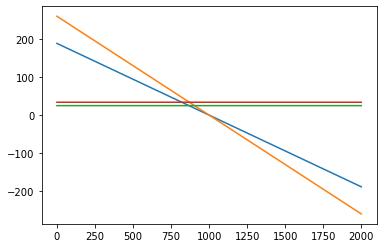

In [1478]:
fig, ax = plt.subplots(1,1)
# ax.clear()
ax.plot(mul[:,0])
ax.plot(mul[:,1])
ax.plot(np.arange(mul.shape[0]),np.repeat(25,mul.shape[0]))
ax.plot(np.arange(mul.shape[0]),np.repeat(34,mul.shape[0]))
# ax.set_xlim(860, 873)
# ax.set_ylim(20, 40)
# ax.plot(mul[:,0]/mul[:,1])
# ax.scatter(1000,34)
# plt.plot(mul[:,2])

In [1367]:
delta[0]/delta[1]

0.7254788160185722

In [1347]:
mul[:,0]/mul[:,1] == delta[0]/delta[1]

array([False, False, False, ..., False, False, False])

In [1384]:
mul[175,0]/mul[175,1]

856.3386086957793

In [1385]:
mul[176,0]/mul[176,1]

-362.35771217711016

In [1397]:
mul[95,0]/mul[95,1]

0.7074749100148208

In [1398]:
mul[96,0]/mul[96,1]

0.7219764048518033

In [1428]:
delta[0]/delta[1]

0.7254788160185722

In [1427]:
mul[1,0]/mul[1,1]

0.7253886010362695

<ipython-input-1480-056175b18380>:2: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(mul[:,0]/mul[:,1])


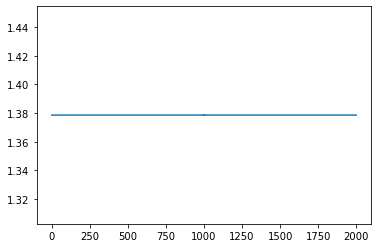

In [1480]:
fig, ax = plt.subplots(1,1)
ax.plot(mul[:,0]/mul[:,1])
# ax.set_ylim(-1,1)
# ax.set_xlim(95,100)
# ax.plot(np.arange(mul.shape[0]),np.repeat(delta[0]/delta[1],mul.shape[0]))

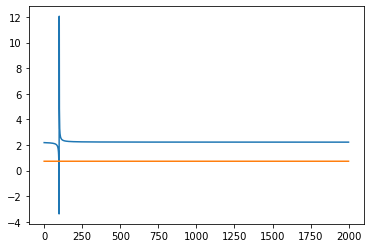

In [1408]:
fig, ax = plt.subplots(1,1)
ax.plot(mul[:,0]/mul[:,1])
# ax.set_ylim(-1,1)
# ax.set_xlim(95,100)
ax.plot(np.arange(mul.shape[0]),np.repeat(delta[0]/delta[1],mul.shape[0]))

In [1315]:
mul.shape

(1000, 3)

In [1299]:
mul[1]

array([ 2.46490788e+02,  1.33031802e+02, -2.95549217e+05])

In [1300]:
mul.shape

(1000, 3)

In [1302]:
pr0[:,3]

array([-1.8263947e+05, -9.8688500e+04, -1.2100000e+02, -1.2100000e+02])

In [1247]:
pr0

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8256541e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [1142]:
r[2,2]

-0.05078125

In [1150]:
with np.printoptions(precision=2, suppress=True):
    print((r/r[2,2])[0,2])
    print((r/r[2,2])[1,2])
    print(r/r[2,2])
    print(q)

900.0
536.0
[[-14580.     -0.    900.]
 [    -0. -14580.    536.]
 [    -0.     -0.      1.]]
[[ 1.  0.  0.]
 [-0.  1.  0.]
 [-0. -0.  1.]]


In [1106]:
def getcen(el):
    centre = [linalg.det(el[:,[1,2,3]]), -linalg.det(el[:,[0,2,3]]), linalg.det(el[:,[0,1,3]])]/(-linalg.det(el[:,[0,1,2]]))
    return centre

In [1108]:
pr0.shape

(4, 4)

In [1109]:
getcen(pr0[:3,:])

array([   99.49532992,    45.69547294, -2382.76923077])

In [1110]:
getcen(pr0[:,:3])

IndexError: index 3 is out of bounds for axis 1 with size 3

In [1112]:
K

array([[ 7.4039063e+02,  0.0000000e+00,  4.5703125e+01],
       [ 0.0000000e+00, -7.4039063e+02,  2.7218750e+01],
       [ 0.0000000e+00,  0.0000000e+00,  5.0781250e-02]])

In [1164]:
pr0.shape

(4, 4)

In [1167]:
getcen(pr0[:3,:])

array([   99.49532992,    45.69547294, -2382.76923077])

In [1175]:
pr0[:3,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8256541e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [1174]:
getcen(pr0[:,:3].T)

array([ 0., -0., -1.])

In [1195]:
pr0

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8256541e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [1196]:
-np.matmul(pr0[:3,:3], getcen(pr0[:3,:]))

array([-1.8256541e+05, -9.8688500e+04, -1.2100000e+02])

In [185]:
el = np.genfromtxt('C:/circles/example.txt', delimiter=',')

In [186]:
getcen(el)

array([1000.00073079, 2000.001952  , 1500.00028314])

In [193]:
np.matmul(np.vstack((el,[0,0,0,1])),np.hstack((getcen(el),1)))

array([-1.74622983e-09, -8.51287041e-10, -9.09494702e-13,  1.00000000e+00])

In [194]:
np.matmul(np.vstack((el,el[2])),np.hstack((getcen(el),1)))

array([-1.74622983e-09, -8.51287041e-10, -9.09494702e-13, -9.09494702e-13])

In [1184]:
el[:,3]

array([-1.44946e+06, -6.32525e+05, -9.18559e+02])

In [1189]:
np.matmul(getcen(el),el)

array([ 1.47557717e+05,  3.85757364e+05,  1.19787766e+06, -2.71589013e+09])

In [1178]:
np.matmul(pr0[:3,:], getcen(pr0[:3,:]))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [1190]:
-np.matmul(el[:3,:3],getcen(el))

array([-1.44946e+06, -6.32525e+05, -9.18559e+02])

In [1170]:
pr0[3,:]

array([ 0.000000e+00,  0.000000e+00, -5.078125e-02, -1.210000e+02])

In [1171]:
pr0

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8256541e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [ ]:
def getcen(el):
    centre = [linalg.det(el[:,[1,2,3]]), -linalg.det(el[:,[0,2,3]]), linalg.det(el[:,[0,1,3]])]/(-linalg.det(el[:,[0,1,2]]))
    return centre

# Camera center moving

In [1197]:
prmat.shape

(144, 4)

In [1217]:
cx = np.array([getcen(prmat[4*i:4*(i+1)-1,:])[0] for i in range(36)])
cy = np.array([getcen(prmat[4*i:4*(i+1)-1,:])[1] for i in range(36)])
cz = np.array([getcen(prmat[4*i:4*(i+1)-1,:])[2] for i in range(36)])

In [108]:
scipy.linalg.rq(pr0[:3,:3])

(array([[ 7.40390668e+02, -8.65710156e-08,  4.57031439e+01],
        [ 0.00000000e+00, -7.40390630e+02,  2.72187511e+01],
        [ 0.00000000e+00,  0.00000000e+00,  5.07812523e-02]]),
 array([[ 6.42787614e-01, -1.16926130e-10,  7.66044440e-01],
        [-7.51586682e-11, -1.00000000e+00, -8.95706119e-11],
        [ 7.66044440e-01,  0.00000000e+00, -6.42787614e-01]]))

In [102]:
prmat[:3,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [203]:
getcen(prmat[:3,:])

array([   99.5953582 ,    45.69547294, -2382.76923077])

In [200]:
getcen(prmat[:3,:])

array([   99.5953582 ,    45.69547294, -2382.76923077])

In [201]:
np.matmul(prmat[:4,:].T,np.hstack((getcen(prmat[:3,:]),1)))

array([ 7.37394700e+04,  3.38325000e+04, -5.67464354e+03, -2.24114670e+07])

In [205]:
np.matmul(np.vstack((prmat[:3,:], [0,0,0,1])),np.hstack((getcen(prmat[:3,:]),1)))

array([-1.89174898e-10, -5.82076609e-11, -5.68434189e-14,  1.00000000e+00])

In [106]:
getcen(prmat[4:7,:])

array([ -334.39988575,    45.70332026, -2339.96842306])

In [97]:
with np.printoptions(precision=2, suppress=True):
    print(scipy.linalg.rq(prmat[4*i:4*(i+1)-1,:3]))

(array([[ 740.39,   -0.  ,   45.7 ],
       [   0.  , -740.39,   27.22],
       [   0.  ,    0.  ,    0.05]]), array([[ 0.98, -0.  ,  0.17],
       [-0.  , -1.  , -0.  ],
       [ 0.17,  0.  , -0.98]]))


In [105]:
with np.printoptions(precision=2, suppress=True):
    print(scipy.linalg.rq(prmat[4*i:4*(i+1)-1,:3]))

(array([[ 740.39,   -0.  ,   45.7 ],
       [   0.  , -740.39,   27.22],
       [   0.  ,    0.  ,    0.05]]), array([[ 0.98, -0.  ,  0.17],
       [-0.  , -1.  , -0.  ],
       [ 0.17,  0.  , -0.98]]))


In [107]:
0.06/0.23

0.2608695652173913

In [76]:
# cx =    
centres = np.zeros([36,3])
for angle in range(36):
    M = prmat[4*angle:4*(angle+1),:]
    print(np.matmul(linalg.inv(M[:3,:3]),M[3,:3]))
    centres[angle,:] = np.matmul(linalg.inv(M[:3,:3]),M[3,:3])

[0.06172839 0.03676269 1.        ]
[0.2308654  0.03620418 0.9592922 ]
[0.37587929 0.03454563 0.86319113]
[0.47927931 0.03183742 0.72328796]
[0.52859383 0.02816185 0.55645711]
[0.51787479 0.0236306  0.38282087]
[0.4484151  0.01838134 0.22332225]
[0.3285926  0.01257358 0.09719922]
[0.17285968 0.00638377 0.01966403]
[6.11861214e-17 2.25184834e-18 6.85871052e-05]
[-0.169137   -0.00638377  0.04077639]
[-0.3141509  -0.01257358  0.13687745]
[-0.4175509  -0.01838134  0.27678062]
[-0.46686541 -0.0236306   0.44361148]
[-0.4561464  -0.02816185  0.61724772]
[-0.38668669 -0.03183742  0.77674634]
[-0.26686422 -0.03454563  0.90286937]
[-0.1111313  -0.03620418  0.98040455]
[ 0.06172839 -0.03676269  1.        ]
[ 0.2308654  -0.03620418  0.9592922 ]
[ 0.37587929 -0.03454563  0.86319113]
[ 0.47927931 -0.03183742  0.72328796]
[ 0.52859383 -0.02816185  0.55645711]
[ 0.51787479 -0.0236306   0.38282087]
[ 0.4484151  -0.01838134  0.22332225]
[ 0.3285926  -0.01257358  0.09719922]
[ 0.17285968 -0.00638377  0.01

NameError: name 'cx' is not defined

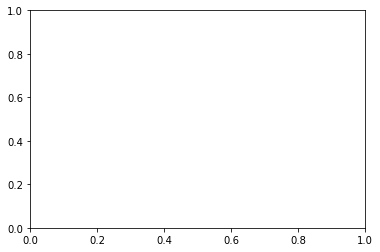

In [92]:
fig, ax = plt.subplots(1,1)
ax.scatter(cx,cz)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x center')
ax.set_ylabel('z center')
ax.scatter(99.49532992, -2382.76923077, c='r')
ax.scatter(-334.61332996, -2339.93078709, c='g')

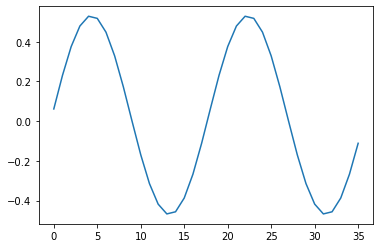

In [77]:
plt.plot(centres[:,0])

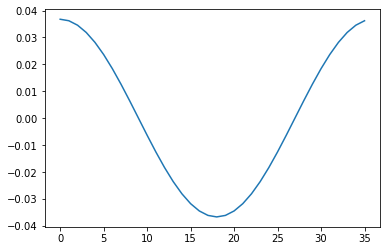

In [78]:
plt.plot(centres[:,1])

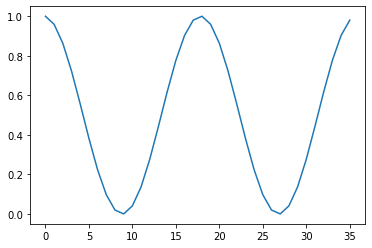

In [79]:
plt.plot(centres[:,2])

Text(0, 0.5, 'z center')

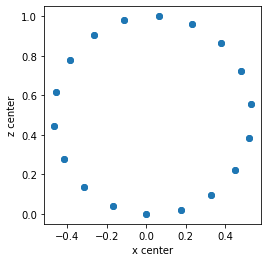

In [115]:
fig, ax = plt.subplots(1,1)
ax.scatter(centres[:,0],centres[:,2])
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x center')
ax.set_ylabel('z center')
# ax.set_xlim(-0.112,-0.11)
# ax.scatter(99.49532992, -2382.76923077, c='r')
# ax.scatter(-334.61332996, -2339.93078709, c='g')

Text(0, 0.5, 'z center')

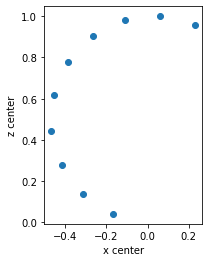

In [84]:
fig, ax = plt.subplots(1,1)
ax.scatter(centres[10:20,0],centres[10:20,2])
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x center')
ax.set_ylabel('z center')
# ax.set_xlim(-0.112,-0.11)
# ax.scatter(99.49532992, -2382.76923077, c='r')
# ax.scatter(-334.61332996, -2339.93078709, c='g')

Text(0, 0.5, 'y center')

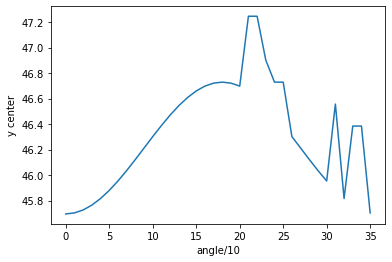

In [1220]:
plt.plot(cy)
plt.xlabel('angle/10')
plt.ylabel('y center')

In [1203]:
len(cc)

36

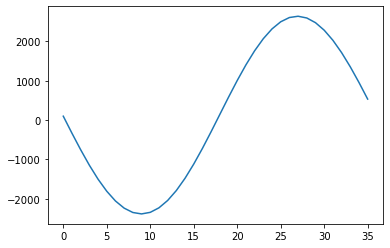

In [1205]:
plt.plot(cc)

In [1199]:
for i in range(36):
    curpr = prmat[4*i:4*(i+1),:]
    print(getcen(curpr[:3,:]))

[   99.49532992    45.69547294 -2382.76923077]
[ -334.61332996    45.70332026 -2339.93078709]
[ -753.28104523    45.72662647 -2223.14454641]
[-1146.36642023    45.76467638 -2035.43065441]
[-1501.29040966    45.81634392 -1782.43954852]
[-1807.02910533    45.88001436 -1471.9857173 ]
[-2054.40557589    45.95377659 -1113.50089182]
[-2236.10059589    46.03540675  -717.6845902 ]
[-2346.7008889     46.12237743  -296.21817426]
[-2382.76923077    46.21209212   139.40719536]
[-2342.81110181    46.30181093   574.27754418]
[-2227.92218902    46.38878324   996.1544781 ]
[-2041.41295468    46.47039845  1392.00477211]
[-1788.84349719    46.54417647  1749.65850052]
[-1477.39196548    46.60785331  2058.49277131]
[-1116.88871636    46.65950242  2308.44937874]
[-718.26704719   46.69755254 2491.88850769]
[-293.44497369   46.72086443 2603.18986681]
[ 144.33908355   46.7287113  2638.76923077]
[ 581.88987469   46.72086109 2597.46903037]
[1005.66473765   46.69755156 2480.46085614]
[1402.78301497   47.24534178

# take right mu

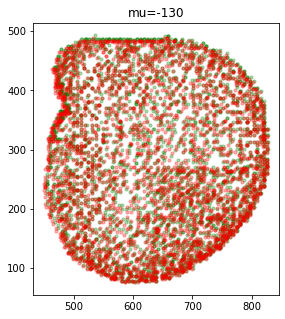

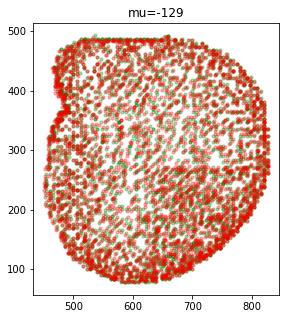

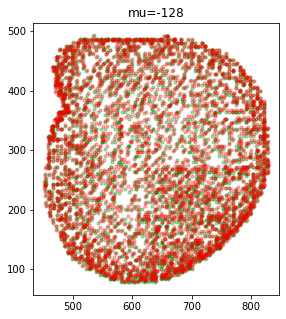

In [1482]:
# mu=1
flname = '1484737/1494452'
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_000.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')

new_h = 700
new_w = 1260
# img0 = np.squeeze(255-img)
img0 = 255-img
properties = regionprops(
    (img0 > filters.threshold_otsu(img0)).astype(int), img0)
cms = tuple(map(lambda x: int(x), properties[0].centroid))
# print(cms)
tempa = (img[cms[0] - new_h//2: cms[0] + new_h//2,
         cms[1] - new_w//2: cms[1] + new_w//2]).astype(np.uint8)
padh = (new_h-tempa.shape[0])//2
padw = (new_w-tempa.shape[1])//2
# print(padh, padw)
# print(tempa.shape)
tempb = np.pad(
    tempa, ((padh, new_h-tempa.shape[0]-padh),
            (padw, new_w-tempa.shape[1]-padw)),
    mode='constant', constant_values=0)
# print(tempb.shape)
new_img = np.squeeze(
    transform.resize(tempb,(250, 450),
        preserve_range=True))
# plt.imshow(new_img, cmap='gray')
# print(new_img.shape)

pr0 = prmat[:4,:4]
p0 = homopcd(p.transpose())

pcd1 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
pcd1 = np.matmul(pcd1,pr0.T)
pcd1 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
for mu in range(-130, -127):


# r = scipy.linalg.rq(pr0[:3,:3])[0]
# q = scipy.linalg.rq(pr0[:3,:3])[1]
# # print(r, q)
# with np.printoptions(precision=2, suppress=True):
#     print(r)
#     print(q)
# pr1 = np.matmul(r + r[2,2]*np.array([[0, 0, -2000],[0,0,-4000],[0,0,0]]), q)
# pr2 = np.copy(prmat[:4,:])
# pr2[:3,:3] = pr1
# delta2 = np.matmul(linalg.pinv(pr0),np.array([cv[0], cv[1], 1, 1]))[:3]
# delta2 = -np.matmul(linalg.inv(pr0[:3,:3]), (mu*np.array([cv[0], cv[1], 1, 1])-pr0[:,3])[:3])
# print(delta2)
# delta2[2] = 0
# delta2 = np.array([20, 45, 0])
# delta2 = np.array([0,0,0])
# delta2 = delta[:3]
    f, a0 = plt.subplots(1, 1, figsize=(5,5))
    delta2 = np.matmul(linalg.inv(pr0[:3,:3]), (mu*np.array([cv[0], cv[1], 0, 0]))[:3])
    pcd2 = pcd+np.repeat(np.expand_dims(delta2, axis=0), pcd.shape[0], axis=0)
    # pcd2 = pcd
    # delta2 = delta
    pcd2 = np.concatenate((pcd2, np.expand_dims(np.repeat(1, pcd.shape[0]), axis = 1)), axis=1)
    pcd2 = np.matmul(pcd2,pr0.T)
    pcd2 = pcd2/np.repeat(np.expand_dims(pcd2[:,3], axis=1), 4, axis = 1)
    # pd0*=0.05
    # pcd1 = pcd1.T

    a0.set_aspect('equal', adjustable='box')
    a0.scatter(pcd1[::10,0]-(c[1]-wc/2),pcd1[::10,1]-(c[0]-hc/2), s=10, alpha=0.3, c='g')
    a0.scatter(pcd2[::10,0],pcd2[::10,1], s=10, alpha=0.3, c='r')
    a0.set_title('mu='+str(mu))

#     a1.imshow(img, cmap='gray')
#     a1.scatter(cms[1],cms[0])
#     a1.scatter(1800/2,1000/2)
#     a1.scatter(pcd1[::25,0], pcd1[::25,1], alpha = 0.1, s=10)
#     a1.add_patch(patches.Rectangle((cms[1]-1260/2, cms[0]-700/2), 1260, 700, linewidth=1, edgecolor='r', facecolor='none'))
#     a1.scatter((r/r[2,2])[0,2], (r/r[2,2])[1,2])

#     a2.imshow(tempa, cmap='gray')
#     a2.scatter(wc/2,hc/2)
#     a2.scatter(wc/2-(c[1]-w/2),hc/2-(c[0]-h/2))
#     # a2.scatter(pcd0[0,:]-(c[1]-wc/2),pcd0[1,:]-(c[0]-hc/2), s=10, alpha=0.1)
#     a2.scatter(pcd2[::25,0],pcd2[::25,1], s=10, alpha = 0.1)
#     # pcd2 = (pcd0 + np.repeat(np.expand_dims([c[1]-w/2, c[0]-750, 0, 0],axis=1),pcd0.shape[1],axis=1))*250/700
#     a3.imshow(new_img, cmap='gray')

#     a3.scatter(450/2,250/2, s=20)
#     a3.scatter(wn/2-(c[1]-w/2)*k,hn/2-(c[0]-h/2)*k, s=20)
#     a3.scatter((pcd0[0,:]-(c[1]-wc/2))*k,(pcd0[1,:]-(c[0]-hc/2))*k, s=10, alpha=0.1)

In [1484]:
pcd.shape

(36328, 3)

In [1485]:
np.mean(pcd, axis=0)

array([121.10617155,  56.74105373, 158.76739705])

In [1486]:
np.min(pcd, axis=0)

array([88., 20., 92.])

In [1487]:
np.max(pcd, axis=0)

array([152.,  92., 223.])

In [1493]:
np.matmul(pr0.T,[0,0,0,1])

array([ 0.000000e+00,  0.000000e+00, -5.078125e-02, -1.210000e+02])

In [1492]:
np.matmul(pr0.T,np.hstack((np.mean(pcd, axis=0), 1)))

array([ 8.96658746e+04,  4.20105445e+04, -7.08746424e+03, -2.77377883e+07])

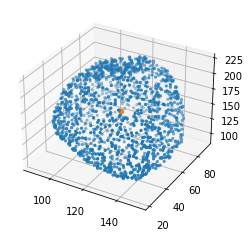

In [1496]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pcd[::25,0],pcd[::25,1],pcd[::25,2], s=5)
ax.scatter(np.mean(pcd, axis=0)[0], np.mean(pcd, axis=0)[1], np.mean(pcd, axis=0)[2])

In [6]:
def prmatread(path):
    with open(path, 'r') as f:
        prmatext = f.readlines()
    pr2 = [prmatext[i].replace('[','').replace(']','').replace(';','')\
           for i in range(len(prmatext))]
    pr3 = ''
    for i in pr2:
        pr3+=i
    pr4 = np.genfromtxt(StringIO(pr3), delimiter=',')
    return pr4

# view all 36 seeds in single 3d

In [10]:
flname = '1484737/1494452'
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')

In [11]:
E = [[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0]]

In [12]:
np.matmul(E,prmat[4*angle:4*(angle+1),:])

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [13]:
np.matmul(pcd,prc)

NameError: name 'prc' is not defined

In [ ]:
    points = [
        [0, 0, 0],
        [1, 0, 0]
    ]
    lines = [
        [0, 1],
        [0, 2]
    ]
    colors = [[1, 0, 0] for i in range(len(lines))]
    line_set = o3d.geometry.LineSet(
        points=o3d.utility.Vector3dVector(points),
        lines=o3d.utility.Vector2iVector(lines),
    )
    line_set.colors = o3d.utility.Vector3dVector(colors)
#     o3d.visualization.draw_geometries([line_set])

In [117]:
pcda = np.zeros([1,3])
for angle in [31, 35]:
# for angle in range(36):
#     print(prmat[angle*4:(angle+1)*4-1,:3].shape)
#     print(np.matmul(pcd,prmat[angle*4:(angle+1)*4-1,:3].T).shape)
#     print(pcda.shape)
#     prc = np.matmul(prmat[angle*4:(angle+1)*4-1,:3],linalg.inv(prmat[:3,:3]))
#     print(prmat[:4,:])
#     linalg.pinv(prmat[:4,:])
#     prc = np.matmul(prmat[angle*4:(angle+1)*4,:],linalg.pinv(prmat[:4,:]))
    M = prmat[4*angle:4*(angle+1),:]
    centre = np.matmul(linalg.inv(M[:3,:3]),M[3,:3])
    print(centre)
    pm = np.matmul(linalg.inv(M[:3,:3]),(-15*np.array([695, 998, 1])-M[3,:3]))
#     pm = np.matmul(linalg.inv(M[:3,:3]),(-15*np.array([695, 692, 1])-M[3,:3]))
    prc = np.matmul(np.matmul(E,M.T),linalg.pinv(np.matmul(E,prmat[:4,:].T)))
    
#     print(prc)
#     prc = np.matmul(prmat[4*angle:4*(angle+1)-1,:3],linalg.pinv(prmat[:4,:])[:3,:3])
#     print(prc)
#     np.matmul(pcd.T,prc)
#     print(pcd.shape, prc.shape)
#     print(np.matmul(pcd,prc).shape)
#     print(pcd.shape, pcda.shape, np.matmul(prc.T,pcd.T).T.shape)
    pcda = np.vstack((pcda,np.matmul(pcd,prc.T)[::100,:]))
    pcda = np.vstack((pcda,np.mean(np.matmul(pcd,prc.T),axis=0)))
#     print(pcda.shape)
pcdb = open3d.geometry.PointCloud()
pcdb.points = open3d.utility.Vector3dVector(pcda)
# create_mesh_sphere()
# mesh_sphere = open3d.create_mesh_sphere(radius=1.0)
# pm = np.mean(np.matmul(pcd,prc.T),axis=0)
mesh_sphere = open3d.geometry.TriangleMesh.create_sphere(radius=5)
mesh_sphere.compute_vertex_normals()
mesh_sphere.paint_uniform_color([0.1, 0.1, 0.7])
mesh_sphere.transform(np.asarray(
                [
                [1, 0, 0, pm[0]],
                [0, 1, 0, pm[1]],
                [0, 0, 1, pm[2]],
                [0, 0, 0, 1]]))
mesh_sphere2 = open3d.geometry.TriangleMesh.create_sphere(radius=5)
mesh_sphere2.compute_vertex_normals()
mesh_sphere2.paint_uniform_color([0.1, 0.4, 0.7])
mesh_sphere2.transform(np.asarray(
                [
                [1, 0, 0, centre[0]],
                [0, 1, 0, centre[1]],
                [0, 0, 1, centre[2]],
                [0, 0, 0, 1]]))
points = [
    [0, 0, 0],
    [pm[0], pm[1], pm[2]]
]
lines = [
    [0, 1]
]
colors = [[1, 0, 0] for i in range(len(lines))]
line_set = open3d.geometry.LineSet(
    points=open3d.utility.Vector3dVector(points),
    lines=open3d.utility.Vector2iVector(lines),
)
line_set.colors = open3d.utility.Vector3dVector(colors)
# print(mesh_sphere)
open3d.visualization.draw_geometries([pcdb, mesh_sphere, mesh_sphere2, line_set])


[-0.46686541  0.0236306   0.44361148]
[-0.1111313   0.03620418  0.98040455]


In [118]:
centres[0]

array([0.06172839, 0.03676269, 1.        ])

In [114]:
# set_points = 
set_points = open3d.geometry.PointCloud()
set_points.points = open3d.utility.Vector3dVector(centres)
open3d.visualization.draw_geometries([set_points])

In [170]:
angle = 0
centres2 = np.zeros([36,3])
for angle in range(36):
#     M = prmat[4*angle:4*(angle+1),:]
    M = prmat[:4,:]
    # np.matmul(M.T,np.hstack((centres[0],1)))
    centres2[angle,:] = (np.matmul(M.T,np.hstack((centres[angle],1)))/np.matmul(M.T,np.hstack((centres[angle],1)))[3])[:3]
# pm = np.matmul(linalg.inv(M[:3,:3]),(1*np.array([695, 998, 1])-M[3,:3]))

In [179]:
np.matmul(prmat[:4,:],np.hstack((centres[0],1)))/np.matmul(prmat[:4,:],np.hstack((centres[0],1)))[3]

array([1.50878390e+03, 8.15265288e+02, 1.00000000e+00, 1.00000000e+00])

In [180]:
centres6 = getcen(prmat[:3,:])

In [183]:
prmat[:3,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8263947e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [181]:
centres6

array([   99.5953582 ,    45.69547294, -2382.76923077])

In [184]:
np.matmul(prmat[:4,:],np.hstack((centres[0],1)))/np.matmul(prmat[:4,:],np.hstack((centres[0],1)))[3]

array([1.50878390e+03, 8.15265288e+02, 1.00000000e+00, 1.00000000e+00])

In [182]:
np.matmul(prmat[:4,:],np.hstack((centres6,1)))/np.matmul(prmat[:4,:],np.hstack((centres6,1)))[3]

array([3.328e+03, 1.024e+03, 1.000e+00, 1.000e+00])

Text(0, 0.5, 'z center')

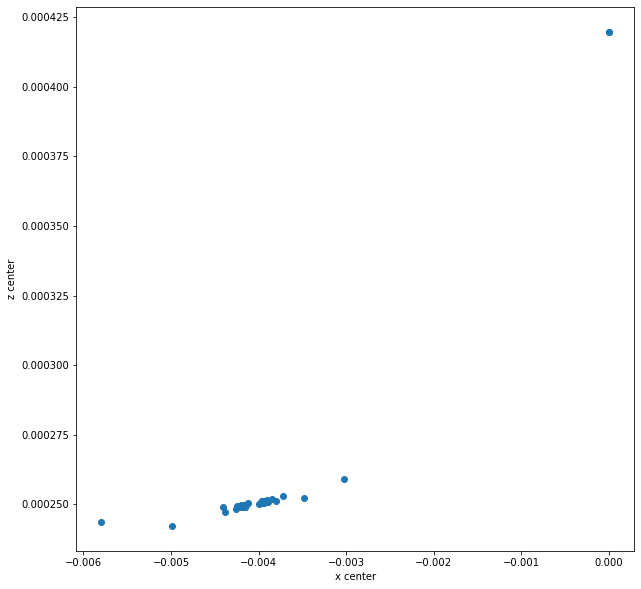

In [173]:

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(centres2[:,0],centres2[:,2])
# ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x center')
ax.set_ylabel('z center')
# ax.set_xlim(-0.1,0.1)
# ax.set_ylim(-0.2,0.1)
# ax.scatter(99.49532992, -2382.76923077, c='r')
# ax.scatter(-334.61332996, -2339.93078709, c='g')

In [148]:
centres5 = centres2 - np.mean(centres2, axis=0)

Text(0, 0.5, 'z center')

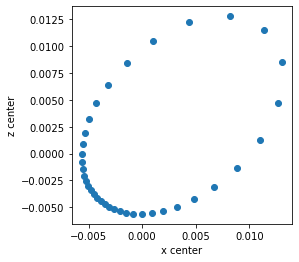

In [149]:
fig, ax = plt.subplots(1,1)
ax.scatter(centres5[:,0],centres5[:,2])
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x center')
ax.set_ylabel('z center')
# ax.set_xlim(-0.112,-0.11)
# ax.scatter(99.49532992, -2382.76923077, c='r')
# ax.scatter(-334.61332996, -2339.93078709, c='g')

In [ ]:
[723]

In [137]:
centres3 = np.genfromtxt('C:/Users/v.cherepashkin/Documents/tips.csv', delimiter=',')

In [138]:
centres3[0,0] = 723

In [145]:
np.mean(centres3, axis=0)

array([768.86111111, 697.13888889])

In [143]:
centres4 = centres3 - np.mean(centres3, axis=0)

Text(0, 0.5, 'y center')

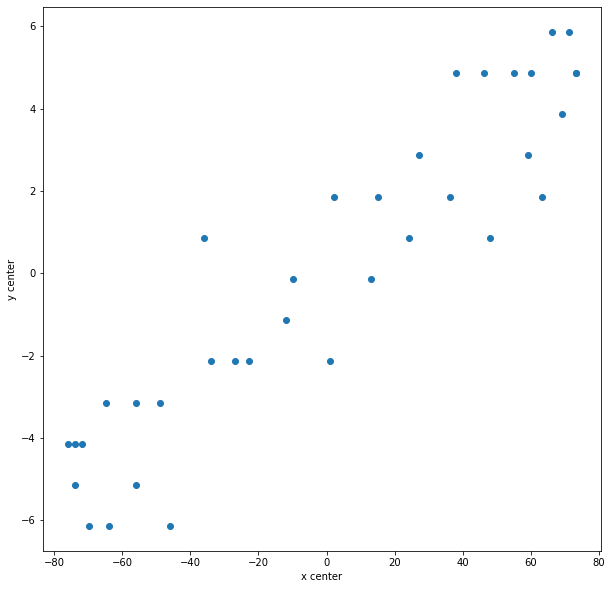

In [172]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(centres4[:,0],centres4[:,1])
# ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x center')
ax.set_ylabel('y center')
# ax.set_xlim(-0.112,-0.11)
# ax.scatter(99.49532992, -2382.76923077, c='r')
# ax.scatter(-334.61332996, -2339.93078709, c='g')

In [67]:
pcdb = open3d.geometry.PointCloud()
pcdb.points = open3d.utility.Vector3dVector(pcda)

In [68]:
# pcd = o3d.io.read_point_cloud("../../test_data/fragment.ply")
# print(pcd)
# print(np.asarray(pcd.points))
# pcd2 = o3d.geometry.PointCloud()
# pcd2.points = o3d.utility.Vector3dVector(pcd)
# pcd.colors = o3d.utility.Vector3dVector(colors/65535)
# pcd.normals = o3d.utility.Vector3dVector(normals)
# o3d.visualization.draw_geometries([pcd2])
# pcd2 = open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply')
# pcd2 = 
open3d.visualization.draw_geometries([pcdb])

# check projection for the other view

(36328, 4)
[121.10617155  56.74105373 158.76739705   1.        ]


<ipython-input-110-17cc7470da1e>:96: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  a2.imshow(tempa, cmap='gray')


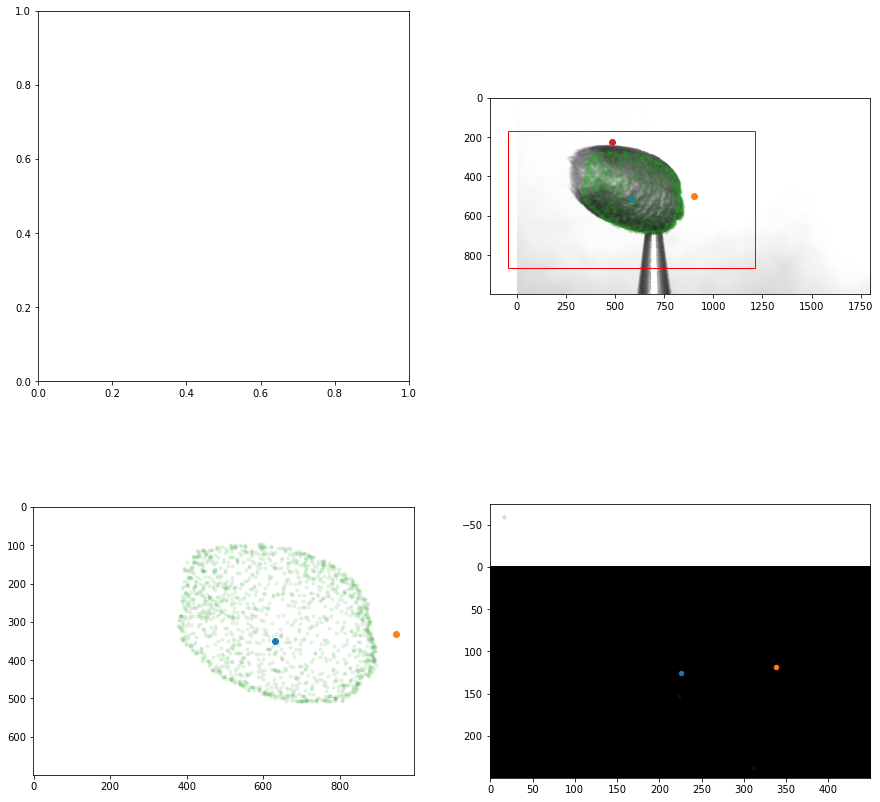

In [110]:
h = 1000
hc = 700
hn = 250
angle = 31
w, wc, wn = h*1.8, hc*1.8, hn*1.8
k = hn/hc
cv = np.array([wc/2-cms[1], hc/2-cms[0], 0, 0])
mu=1
flname = '1484737/1494452'
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/'+flname+'/rotation_'+str(10*angle).zfill(3)+'.tif'))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/'+flname+'_Surface.ply').points)
prmat = prmatread('C:/cherepashkin1/phenoseed/598/'+flname+'_ProjectionMatrices.txt')
# pr0 = prmat[:4,:]
new_h = 700
new_w = 1260
# img0 = np.squeeze(255-img)
img0 = 255-img
properties = regionprops(
    (img0 > filters.threshold_otsu(img0)).astype(int), img0)
cms = tuple(map(lambda x: int(x), properties[0].centroid))
# print(cms)
tempa = (img[cms[0] - new_h//2: cms[0] + new_h//2,
         cms[1] - new_w//2: cms[1] + new_w//2]).astype(np.uint8)
padh = (new_h-tempa.shape[0])//2
padw = (new_w-tempa.shape[1])//2
# print(padh, padw)
# print(tempa.shape)
tempb = np.pad(
    tempa, ((padh, new_h-tempa.shape[0]-padh),
            (padw, new_w-tempa.shape[1]-padw)),
    mode='constant', constant_values=0)
# print(tempb.shape)
new_img = np.squeeze(
    transform.resize(tempb,(250, 450),
        preserve_range=True))
# plt.imshow(new_img, cmap='gray')
# print(new_img.shape)

pr0 = prmat[angle*4:4*(angle+1),:]
f, ((a0, a1), (a2, a3)) = plt.subplots(2, 2, figsize=(15,15))
# p0 = homopcd(p.transpose())

pcd1 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
# print(pcd1.shape)
pcd1 = np.matmul(pcd1,pr0.T)
pcd1 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
print(pcd1.shape)
# a0.scatter(pcd1[:,0], pcd1[:,1])
# pcd1 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
#     pcd.shape[0]), axis = 1)), axis=1)
origin = np.hstack((np.mean(pcd,axis=0),1))
print(origin)
origin1 = np.matmul(origin,pr0.T)
origin2 = origin1/origin1[3]
# pcd1 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
# r = scipy.linalg.rq(pr0[:3,:3])[0]
# q = scipy.linalg.rq(pr0[:3,:3])[1]
# # print(r, q)
# with np.printoptions(precision=2, suppress=True):
#     print(r)
#     print(q)
# pr1 = np.matmul(r + r[2,2]*np.array([[0, 0, -2000],[0,0,-4000],[0,0,0]]), q)
# pr2 = np.copy(prmat[:4,:])
# pr2[:3,:3] = pr1
# delta2 = np.matmul(linalg.pinv(pr0),np.array([cv[0], cv[1], 1, 1]))[:3]
# delta2 = -np.matmul(linalg.inv(pr0[:3,:3]), (mu*np.array([cv[0], cv[1], 1, 1])-pr0[:,3])[:3])
# print(delta2)
# delta2[2] = 0
# delta2 = np.array([20, 45, 0])
# delta2 = np.array([0,0,0])
# delta2 = delta[:3]
delta2 = np.matmul(linalg.inv(pr0[:3,:3]), (-135*np.array([cv[0], cv[1], 0, 0]))[:3])
pcd2 = pcd+np.repeat(np.expand_dims(delta2, axis=0), pcd.shape[0], axis=0)
# pcd2 = pcd
# delta2 = delta
pcd2 = np.concatenate((pcd2, np.expand_dims(np.repeat(1, pcd.shape[0]), axis = 1)), axis=1)
pcd2 = np.matmul(pcd2,pr0.T)
pcd2 = pcd2/np.repeat(np.expand_dims(pcd2[:,3], axis=1), 4, axis = 1)
# pd0*=0.05
# pcd1 = pcd1.T

a0.set_aspect('equal', adjustable='box')
# a0.scatter(pcd1[:,0]-(cms[1]-wc/2),pcd1[:,1]-(cms[0]-hc/2), s=10, alpha=0.1, c='r')
# a0.scatter(pcd2[:,0],pcd2[:,1], s=10, alpha=0.1, c='g')

a1.imshow(img, cmap='gray')
a1.scatter(cms[1],cms[0])
a1.scatter(1800/2,1000/2)
a1.scatter(pcd1[::25,0], pcd1[::25,1], alpha = 0.1, s=10)
a1.add_patch(patches.Rectangle((cms[1]-1260/2, cms[0]-700/2), 1260, 700, linewidth=1, edgecolor='r', facecolor='none'))
# a1.scatter(4*origin[0], 4*origin[1])

# a1.scatter((r/r[2,2])[0,2], (r/r[2,2])[1,2])

a2.imshow(tempa, cmap='gray')
a2.scatter(wc/2,hc/2)
a2.scatter(wc/2-(cms[1]-w/2),hc/2-(cms[0]-h/2))
# a2.scatter(pcd0[0,:]-(c[1]-wc/2),pcd0[1,:]-(c[0]-hc/2), s=10, alpha=0.1)
a2.scatter(pcd2[::25,0],pcd2[::25,1], s=10, alpha = 0.1)
# pcd2 = (pcd0 + np.repeat(np.expand_dims([c[1]-w/2, c[0]-750, 0, 0],axis=1),pcd0.shape[1],axis=1))*250/700
a3.imshow(new_img, cmap='gray')

a3.scatter(450/2,250/2, s=20)
a3.scatter(wn/2-(cms[1]-w/2)*k,hn/2-(cms[0]-h/2)*k, s=20)
a3.scatter((pcd1[0,:]-(cms[1]-wc/2))*k,(pcd1[1,:]-(cms[0]-hc/2))*k, s=10, alpha=0.1)